In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'C:\Users\A S U S\Desktop\dataset\Titanic\train.csv')

In [3]:
print('shape of the dataset: ',df.shape)

shape of thedataset:  (891, 12)


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Exploration

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
cat_features = df[['Survived','Pclass','Sex','Ticket','Embarked','Cabin']]
num_features = df[['Age', 'SibSp','Parch','Fare']]

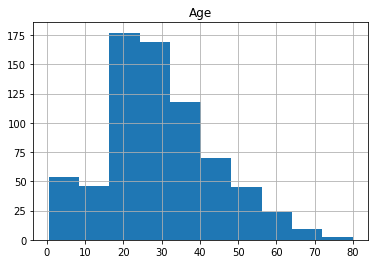

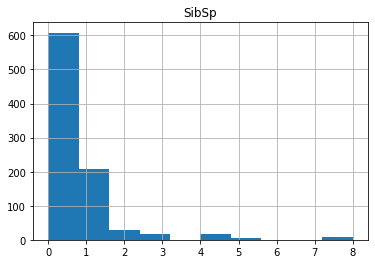

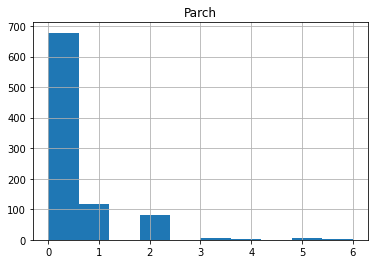

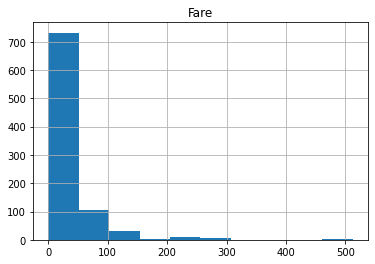

In [10]:
for feature in num_features:
    df[feature].hist()
    plt.title(feature)
    plt.show()

In [11]:
num_features.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


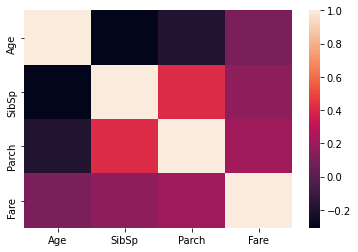

In [12]:
import seaborn as sns
sns.heatmap(num_features.corr());

In [13]:
pd.pivot_table(df,index='Survived',values=num_features)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


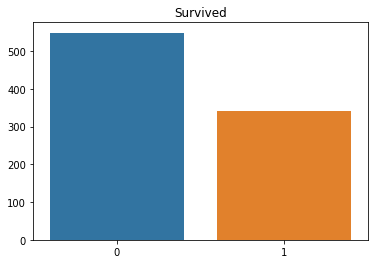

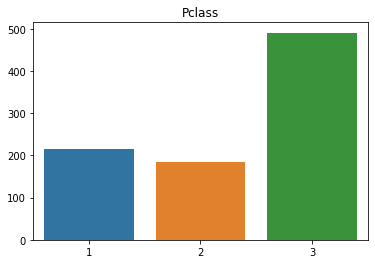

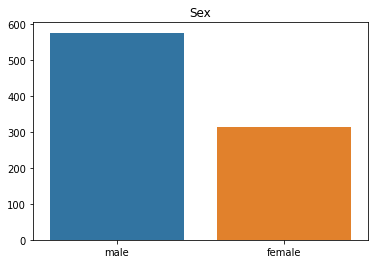

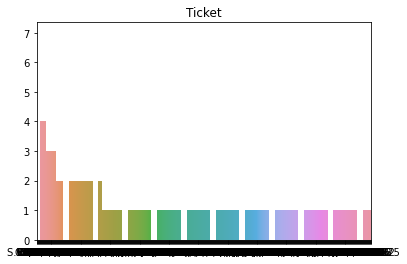

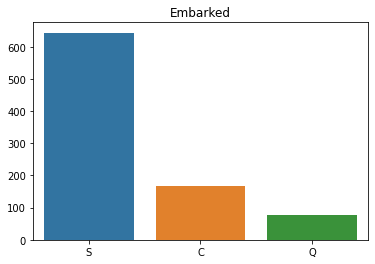

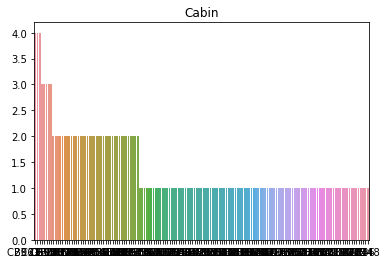

In [14]:
for feature in cat_features:
    sns.barplot(df[feature].value_counts().index,df[feature].value_counts().values)
    plt.title(feature)
    plt.show();

Cabin and ticket graphs are very messy. This is an area where we may want to do some feature engineering!

In [15]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# Feature Engineering

In [16]:
df['Cabin_Letter'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else str(x).split()[0][0])
df['Cabin_Letter'].value_counts()

0    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

<AxesSubplot:>

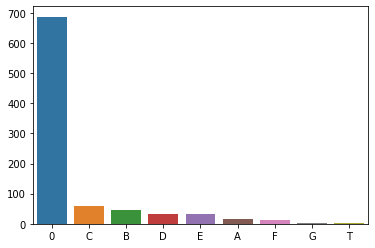

In [17]:
sns.barplot(df['Cabin_Letter'].value_counts().index,df['Cabin_Letter'].value_counts().values)

In [18]:
pd.pivot_table(df,index='Survived',columns='Cabin_Letter',values='Ticket',aggfunc='count')

Cabin_Letter,0,A,B,C,D,E,F,G,T
Survived,,,,,,,,,
0,481.0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0
1,206.0,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN


In [19]:
df['ticket_numeric'] = df.Ticket.apply(lambda x: 1 if x.split('A-Za-z')[0][0].isnumeric() else 0)

In [20]:
df['ticket_numeric'].value_counts()

1    661
0    230
Name: ticket_numeric, dtype: int64

In [21]:
pd.pivot_table(df,index='Survived',columns='ticket_numeric',values='Ticket',aggfunc='count')

ticket_numeric,0,1
Survived,,
0,142,407
1,88,254


In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter,ticket_numeric
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


# Data Preprocessing for Model 

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter,ticket_numeric
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,1


In [24]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Cabin_Letter        0
ticket_numeric      0
dtype: int64

In [25]:
df.Embarked.dropna(inplace=True)

In [26]:
df.Age.fillna(df.Age.median(),inplace=True)

In [27]:
df.Fare.fillna(df.Fare.median(),inplace=True)

In [28]:
df['Cabin_Letter'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else str(x).split()[0][0])
df['Cabin_Letter'].value_counts()

0    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [29]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter,ticket_numeric
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,1


<AxesSubplot:>

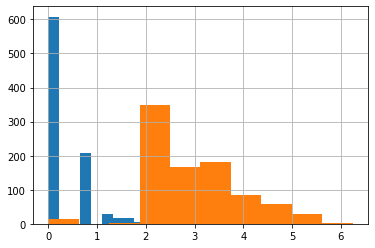

In [30]:
#tried log norm of sibsp (not used)

df['norm_sibsp'] = np.log(df.SibSp+1)
df['norm_sibsp'].hist()

# log norm of fare (used)

df['norm_fare'] = np.log(df.Fare+1)
df['norm_fare'].hist()

In [31]:
df.Pclass = df.Pclass.astype('str')
df.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: object

In [32]:
X_data = pd.get_dummies(df[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','Cabin_Letter','ticket_numeric']])
X_data

,Age,SibSp,Parch,norm_fare,ticket_numeric,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Embarked_S,Cabin_Letter_0,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_C,Cabin_Letter_D,Cabin_Letter_E,Cabin_Letter_F,Cabin_Letter_G,Cabin_Letter_T
0,22.0,1,0,2.110213,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,0
1,38.0,1,0,4.280593,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,26.0,0,0,2.188856,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,0,0
3,35.0,1,0,3.990834,1,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,35.0,0,0,2.202765,1,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,2.639057,1,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
887,19.0,0,0,3.433987,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
888,28.0,1,2,3.196630,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,0,0
889,26.0,0,0,3.433987,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [33]:
y= df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [34]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = X_data.copy()
X[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(X_data[['Age','SibSp','Parch','norm_fare']])
X


,Age,SibSp,Parch,norm_fare,ticket_numeric,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Embarked_S,Cabin_Letter_0,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_C,Cabin_Letter_D,Cabin_Letter_E,Cabin_Letter_F,Cabin_Letter_G,Cabin_Letter_T
0,-0.565736,0.432793,-0.473674,-0.879741,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,0
1,0.663861,0.432793,-0.473674,1.361220,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,-0.258337,-0.474545,-0.473674,-0.798540,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,0,0
3,0.433312,0.432793,-0.473674,1.062038,1,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,0.433312,-0.474545,-0.473674,-0.784179,1,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.181487,-0.474545,-0.473674,-0.333698,1,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
887,-0.796286,-0.474545,-0.473674,0.487082,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
888,-0.104637,0.432793,2.008933,0.242007,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,0,0
889,-0.258337,-0.474545,-0.473674,0.487082,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 85)

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [37]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.65034965 0.77622378 0.81690141 0.73239437 0.78873239]
0.7529203191175021


In [38]:
lr = LogisticRegression(random_state = 85)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79020979 0.81118881 0.82394366 0.83098592 0.8028169 ]
0.8118290160543682


In [39]:
dt = tree.DecisionTreeClassifier(random_state = 85)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76923077 0.77622378 0.78873239 0.8028169  0.76056338]
0.7795134443021766


In [40]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7972028  0.8041958  0.77464789 0.78873239 0.83802817]
0.8005614104205652


In [41]:
rf = RandomForestClassifier(random_state = 85)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74825175 0.81118881 0.82394366 0.80985915 0.81690141]
0.8020289569585344


In [42]:
svc = SVC(probability = True,random_state = 85)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81118881 0.83216783 0.83098592 0.84507042 0.83098592]
0.8300797793755541


# Model Building (Baseline Validation Performance)
Before going further, I like to see how various different models perform with default parameters. I tried the following models using 5 fold cross validation to get a baseline. With a validation set basline, we can see how much tuning improves each of the models. Just because a model has a high basline on this validation set doesn't mean that it will actually do better on the eventual test set.

1. Naive Bayes (75.2%)
2. Logistic Regression (81.2%)
3. Decision Tree (77.9%)
4. K Nearest Neighbor (80.5%)
5. Random Forest (80.2%)
6. Support Vector Classifier (83.01%)


# Model Tuned Performance
After getting the baselines, let's see if we can improve on the indivdual model results!I mainly used grid search to tune the models. I also used Randomized Search for the Random Forest and XG boosted model to simplify testing time.

In [43]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [44]:
def clf_performance(classifier,model_name):
    print(model_name)
    print(classifier.best_score_)
    print(classifier.best_params_)

In [45]:
lr = LogisticRegression(random_state = 85)
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Logistic Regression
0.8146360681571949
{'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
svc = SVC(probability = True)
param_grid = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
